# Project 2a: Alloy cluster expansions

In this project you will explore different methods for constructing an alloy cluster expansion model for the Au-Cu alloy, using various levels of physical intuition in the model construction process.
This physical intuition will be instilled through more and more complex priors, ranging from the completely uninformative prior of OLS to a full Bayesian analysis where the prior hyperparameters are sampled as well.
The different cluster expansion models are then applied to the problem of predicting the ground state structure amongst a few different candidates. 

Note that it is not required for you to understand all the details of the cluster expansion (CE) formalism to solve the project.

**You should hand in a report, via Canvas, maximum 6 pages (excluding references). 
Do not attach any appendices.
In the report you should present your data, models and the final results.
Do not forget to visualize your data and results.
It is important that you discuss your findings and reflect on the results.
In addition you need to hand in your Python code.
Your code should run without errors and upon inspection reproduce the main results you present in the report.
We will award extra points for code that we deem well written and structures (but we will not deduct points in the opposite case).
Emphasis will be put on your ability to use appropriate terminology to describe and discuss the employed statistical methodologies and results.
Please use the LaTeX template for reports that is provided on the homepage.**

**<font color=red>DEADLINE: Tuesday, Dec 3, 23:59</font>**


## Alloys
In order to study alloys on the atomic scale one can resort to density functional theory (DFT) calculations.
DFT can provide the energy of a given atomistic structure with high accuracy.
The database that we provide you with is based on DFT calculations.

The mixing energy per atom of a structure is defined as
\begin{equation}
\large
    E_\text{mix} = \frac{E_\text{structure} - n_\text{Au} E_\text{Au} - n_\text{Cu} E_\text{Cu}}{n_\text{Au} + n_\text{Cu}}
\end{equation}
where $E_\text{structure}$ is the total energy of the structure, $n_\text{Au}$ number of Au atoms in the structure and $E_\text{Au}$ the energy of pure Au.
Working with the mixing energy is often convient as it is the relevant energy when considering, e.g., phase stability of alloys.
Below a few different structures (configurations) are displayed.

<img src="images/configurations.png" alt="Drawing" style="width: 750px;"/>




## The configurational space problem
If we consider a binary system (A-B) and a lattice consisting of 100 atoms, this yields $2^{100}\approx 10^{30}$ unique ways of occupaying the lattice.
While many of the structures will be duplicates when considering translation and rotational invariance we are still left with a huge number of configurations that would need to be considered for, e.g., thermodynamic averages or ground state searches.

Calculating the energy of multiple structures with DFT is computationally very expensive and thus to solve this configurational space problem one often turns to building atomistic models based on DFT.
One of the more common atomistic models to employ is the alloy cluster expansion.


## Cluster expansions
The alloy cluster expansion is a model based on a perfect lattice.
This lattice can be occupied by various chemical species (Au and Cu in our case).
In this approach the energy of the atomic structure is modeled as a sum over the orbits times their corresponding effective cluster interaction.
In principle it looks like
\begin{equation}
\large
E_{mix} = J_0 + \sum_\alpha m_\alpha J_\alpha,
\end{equation}
where $\alpha$ refers to different orbits such as nearest neighbor pairs, next nearest neighbor pairs, triplets etc, $m_\alpha$ is the multiplicity, i.e. the number of symmetry equivalent clusters in the orbit per unit cell, and $J_\alpha$ is the corresponding effective cluster interaction (ECI).
In this project, we are not concerned with the details of decomposing a structure into orbits but simply use the [`icet` package](https://icet.materialsmodeling.org) for this purpose.

<img src="images/clusters_v1.png" alt="Drawing" style="width: 650px;"/>


Instead we focus on how to determine the unknown parameters (ECIs) for the cluster expansion model, and how to choose which type of clusters (orbits) to include in the model.
The equation above can be formulated as a dot product by defining $\boldsymbol{\xi}=[1, N_1, N_2, ...]$ and $\boldsymbol{J}=[J_0, J_1, J_2, ...]$ as $E_{mix} = \boldsymbol{\xi} \boldsymbol{J}$.
Here, $\boldsymbol{\xi}$ is often refered to the cluster vector of the given configuration.

If the mixing energy, $E_{mix}$, is provided, e.g., from DFT calculations, for a set of configurations, then the problem of finding the ECIs, $\boldsymbol{J}$, can be cast in the form of OLS
\begin{equation}
\large
\boldsymbol{J}_{opt} = \min \boldsymbol{J} || \boldsymbol{X} \boldsymbol{J} - \boldsymbol{E_{mix}} ||_2 ^2,
\end{equation}
where $\boldsymbol{E}_{mix}$ is a vector containing the mixing energies for all structures and $\boldsymbol{X}$ a matrix where each row corresponds to a cluster vector one of the given structures.


## The linear problem
Simplest way to solve the linear problem would be to use ordinary least-squares (OLS). However, OLS tends to overfit and thus linear regression with regularization such as Ridge and LASSO are feasible alternatives.

A common issue in finding the ECIs is to select an approriate number of features (clusters) to include in the model. Features in our problem would corresponds to clusters with various interatomic distances and order. Too few can lead to underfitting and too many to overfitting. 

In this project you will construct cluster-expansion model using linear regression methods such as Lasso and ARDR. You will use cross-validation but also information criteria such as AIC and BIC in order to evaluate how many features is reasonable to include in your cluster expansion. For more information and details about these methods and metrics, see the lecture notes.

Lastly, you will see how bayesian parameter estimation of the ECIs can be used for cluster-expansion.

### Cross validation
You may freely chose a suitable cross-valdation method to use for the following tasks. K-fold is commonly used and available through `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). Ten folds might be a good starting point to try out.

### Information criteria
The Bayesian information criteria (BIC) is defined as
\begin{equation}
\text{BIC} = 2 log(L_*) - N_p log(N_d)
\end{equation}
where $L_*$ is the maximized likelihood, $N_p$ the number of parameters, and $N_d$ number of data points.     
The energies (or data) can be modeled through
Here we assume the errors, $\epsilon$, are normal distributed with zero mean and variance $\sigma^2$.
\begin{equation}
\boldsymbol{E} = \boldsymbol{\xi} \boldsymbol{J} + \epsilon , \quad \epsilon \sim \mathcal{N}(\mu=0, \sigma^2) \\
\end{equation}
Therefore the likelihood, $P(D|\boldsymbol{J}, \sigma)$, can be defined as
\begin{equation}
L = P(D|\boldsymbol{J}, \sigma) = \frac{1}{(2\pi \sigma^2)^{N_d/2}}\exp{(-||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2 / 2\sigma^2)}
\end{equation}
The ECIs, $\boldsymbol{J}$, you will obtain from linear regression algorithms (LASSO, etc), and $\sigma$ can be found from setting $\frac{\mathrm{d} L }{\mathrm{d} \sigma} = 0$. This is left as an exercise to the reader but final expression for BIC becomes
\begin{equation}
\text{BIC} = -N_d log(\text{MSE}) - N_p log(N_d) + \text{const}
\end{equation}
where the constant term, $\text{const}$, is irrelevant and $\text{MSE}$ is the mean squared error, defined as 
\begin{equation}
\text{MSE} = \frac{1}{N_d}||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2
\end{equation}

### sklearn
Regression algorithms like OLS, Ridge, ARDR (and many more) are available in `sklearn`. One can also use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from `sklearn` to standardize data. 

*Note: Since we're including the constant term in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

## Additional information
For more information, see the lecture notes as well as the demos. 
For Task 3, a similar analysis is performed in the notebook `ce-with-covariance-matrix.ipynb`.

Additional information in regards to cluster expansions and how these can be trained and used can be found in the  following papers:

* Robust data-driven approach for predicting the configurational energy of high entropy alloys (doi.org/10.1016/j.matdes.2019.108247)
* [`icet`](https://icet.materialsmodeling.org) – A Python Library for Constructing and Sampling Alloy Cluster Expansions (doi.org/10.1002/adts.201900015)
* Covariance regularization by Mueller et al. [Physical Review B **80**, 024103 (2009)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.80.024103)

In this project, you are provided with data in the form of [ASE databases](https://wiki.fysik.dtu.dk/ase/ase/db/db.html). Please see the notebook `introduction-to-ase.ipynb` for further details on how to read such databases and an introduction to ASE in general, and the notebook `introduction-to-cluster-expansions.ipynb` for tips on working with cluster expansions.

## Setup

In [1]:
import ase
import icet
from ase.db import connect

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import sklearn
import pandas as pd
import emcee
sns.set_context('notebook')

# LaTeX font
plt.style.use('default')
plt.rc('text', usetex = True)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
font_size = 16
plt.rcParams['font.size'] = font_size

sns.set_palette('deep')

## Task 1: Prepare data (1.5p)

The data can be found in the ASE database `AuCu-structures.db`.
Here each row corresponds to an atomic structure with an attached mixing energy in units of eV per atom.
Use fixed cutoff radii of 8 Å, 6 Å, and 5 Å for pairs, triplets, and quadruplets.

**Task:** 
* Read the database and collect the atomic structures and energies.
* Plot the mixing energy as a function of Cu concentration
* Standardize the mixing energy $E$ and the cluster vectors $X$. 

**Discuss:**
* Why is it good practice to standardize the data? Is it necessary in this case?

*Hints:*
- The mixing energy for a structure can be retrieved by accessing the `mixing_energy` field on the row corresponding to that structure, like `E_mix = row.mixing_energy`.

ase db AuCu-structures.db

In [2]:
# Read ASE database and collect structures + mixing energies
db_path = 'AuCu-structures.db'
db = connect(db_path)

structures = []
mixing_energies = []
metadata = []

for row in db.select():
    atoms = row.toatoms()   # Atoms object
    structures.append(atoms)
    E_mix = row.mixing_energy
    mixing_energies.append(E_mix)
    metadata.append({
        'row_id': row.id,
        'formula': row.formula,
        'volume': row.volume,
        'natoms': row.natoms,
        'mass': row.mass
    })

mixing_energies = np.asarray(mixing_energies)
metadata_df = pd.DataFrame(metadata)

print(f'Loaded {len(structures)} structures.')
print(f'Mixing energy mean: {mixing_energies.mean():.4f} eV/atom')
# print(metadata_df)
print(mixing_energies[0])

Loaded 52 structures.
Mixing energy mean: -0.0314 eV/atom
0.003071504732031463


In [3]:
prim = db.get(formula='Au').toatoms()
cs = icet.ClusterSpace(prim, cutoffs=[8, 6, 5], chemical_symbols=['Au', 'Cu'])

In [4]:
# Build cluster-vector matrix X and a pandas DataFrame `conc_df` with composition and energies
X_rows = []
rows = []

for i, structure in enumerate(structures):
    vec = cs.get_cluster_vector(structure=structure)
    X_rows.append(vec)

    n = structure.get_number_of_atoms()
    cu_frac = structure.symbols.count('Cu') / n
    au_frac = structure.symbols.count('Au') / n
    mixing_per_atom = mixing_energies[i]
    mixing_total = mixing_per_atom * n

    rows.append({
        'Cu_fraction': cu_frac,
        'Au_fraction': au_frac,
        'mixing_energy_per_atom': mixing_per_atom,
        'mixing_energy_total': mixing_total,
        'n_atoms': n,
    })

# Convert X to array (shape: n_structures x n_features)
X = np.vstack(X_rows)

# Create DataFrame
df = pd.DataFrame(rows)

print(f'X shape: {X.shape}')
df.head()

X shape: (52, 24)


/var/folders/xl/schcbct544b8f32_b4484x5c0000gn/T/ipykernel_35374/3024749702.py:9: FutureWarning: Please use len(self) or, if your atoms are distributed, self.get_global_number_of_atoms.
  n = structure.get_number_of_atoms()


,Cu_fraction,Au_fraction,mixing_energy_per_atom,mixing_energy_total,n_atoms
0,0.000000,1.000000,0.003072,0.003072,1
1,1.000000,0.000000,-0.002671,-0.002671,1
2,0.500000,0.500000,0.012795,0.025589,2
3,0.333333,0.666667,-0.015187,-0.045562,3
4,0.666667,0.333333,-0.020937,-0.062810,3


### Plot mixing energy in eV

[0.         0.2        0.25       0.33333333 0.4        0.5
 0.6        0.66666667 0.75       0.8        1.        ]


Text(0, 0.5, 'Mixing energy [eV/atom]')

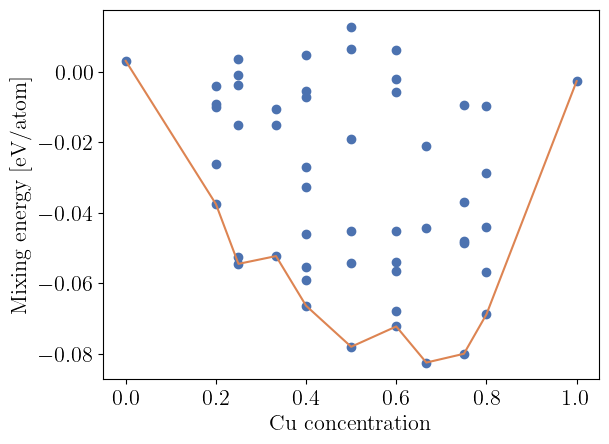

In [5]:
E_min = []

idx = np.unique(df['Cu_fraction'])
print(idx)
for i in range(len(idx)):
    energies = df['mixing_energy_per_atom'][idx[i] == df['Cu_fraction']]
    E_min.append(np.min(energies))


plt.plot(df['Cu_fraction'], df['mixing_energy_per_atom'], 'o')
plt.plot(idx, E_min, '-', label='Minimum mixing energy')
plt.xlabel('Cu concentration')
plt.ylabel('Mixing energy [eV/atom]')

### Standardize data

Text(0, 0.5, 'Mixing energy (eV/atom)')

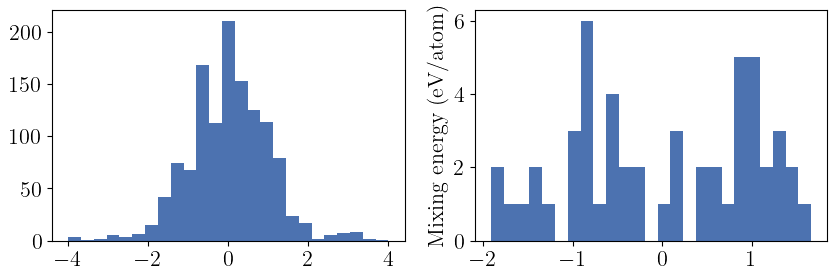

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_stand = scaler.fit_transform(X)
X_stand[:,0] = 1  # Set constant term to 1
E_stand = scaler.fit_transform(mixing_energies.reshape(-1, 1))


# print(E_stand)

fig, axes = plt.subplots(1, 2, figsize=(10,3))
axes[0].hist(X_stand.flatten(), bins=25)
axes[1].hist(E_stand.flatten(), bins=25)
axes[1].set_ylabel('Mixing energy (eV/atom)')

## Task 2: OLS and ridge regression (2p)

Use OLS and ridge to fit the ECIs. You may use routines from, e.g., scikit-learn.

Ridge regression uses a hyperparameter $\alpha$ to penalize large values for the ECIs, by using the following loss function: 

$$ 
L = ||E - XJ||^2 + \alpha ||J||^2
$$

where $E$ is the mixing energy and $x$ the design matrix of cluster vectors and $J$ the ECIs. The solution $J_{opt}$ that minimizes $L$  can then be written as:

$$ 
J_{opt, Ridge} = (X^T X + \alpha I)^{-1} X^T E
$$

**Tasks**
* Fit ECIs using OLS and ridge regression
    * Use k-fold cross validation to find a good value for $\alpha$. 
* Compare the CV-RMSE and size of the ECIs between OLS and Ridge. The ECIs can for instance be plotted in a bar chart.

**Discuss**
* What are the qualitative differences between OLS and Ridge?

*Note: Since the constant term is included in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

### OLS

In [7]:
J_ols = np.linalg.lstsq(X_stand, E_stand, rcond=None)[0].ravel()
print(J_ols)

[ 2.46336372e-16  5.65847276e-01  7.26548876e-01 -4.54981714e-01
  6.46060613e-02  1.06686803e-01  1.76165959e-01 -5.25979792e-01
 -3.89064372e-02 -1.26382247e-01 -2.26633167e-01 -2.20121341e-02
  1.00296208e-01  1.34408766e-02 -1.12144440e-01 -6.73001167e-02
  9.51995323e-02 -1.24349444e-01  2.01324074e-02  9.80851113e-02
 -6.67224509e-03  2.03959756e-01  8.71344181e-03 -3.49079025e-04]


### Ridge

In [8]:
# Fit ECI and find best alpha
#from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV

kf = sklearn.model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

alphas = [1e-3, 1e-2, 1e-1, 1]
clf = RidgeCV(alphas=alphas, cv=kf, fit_intercept=False)
clf.fit(X_stand, E_stand) # X design matrix, E targets
J_ridge = clf.coef_
print(f'ECI vector: {J_ridge}')
print(f'Optimal alpha: {clf.alpha_}')


ECI vector: [[ 2.54709252e-16  5.37387513e-01  7.19645294e-01 -4.46132293e-01
   5.86873909e-02  1.09134662e-01  1.79637767e-01 -5.28042088e-01
  -4.05333283e-02 -1.06277726e-01 -2.24840532e-01 -4.44854293e-02
   7.64431450e-02  9.85852691e-03 -1.16047210e-01 -4.15005496e-02
   9.23592141e-02 -1.13286567e-01  3.24192702e-02  1.04078813e-01
   6.78933965e-04  1.95566198e-01  1.89563060e-02 -1.69762470e-03]]
Optimal alpha: 0.1


### CV-RMSE

In [9]:
def compute_mse(A, y, parameters):
    y_predicted = np.dot(A, parameters)
    dy = y - y_predicted
    mse = np.mean(dy**2)
    return mse

# Run Kfold loop with optimal alpha to determine RMSE for each fold
def cv_rmse_ridge(alpha, X_stand = X_stand, E_stand=E_stand):
    # Assuming validation and test data are the same here
    ridge_rmse_valid_folds = []
    ridge_rmse_train_folds = []

    for i, (train_index, test_index) in enumerate(kf.split(X_stand)):
        X_train, X_test = X_stand[train_index], X_stand[test_index]
        E_train, E_test = E_stand[train_index], E_stand[test_index]

        # Fit data
        ridge = sklearn.linear_model.Ridge(alpha=alpha, fit_intercept=False, max_iter=50000, tol=1e-6)
        ridge.fit(X_train, E_train)

        # RMSE
        J = ridge.coef_.T
        #E_pred_valid = X_test @ J #ridge.predict(X_test)
        #E_pred_train = X_train @ J #ridge.predict(X_train)

        rmse_valid = np.sqrt(compute_mse(X_test, E_test, J))
        ridge_rmse_valid_folds.append(rmse_valid)
        rmse_train = np.sqrt(compute_mse(X_train, E_train, J))
        ridge_rmse_train_folds.append(rmse_train)
        # print(f'Fold {i+1}, RMSE: {rmse:.4f}')# eV/atom')

    # Cross validate over the folds
    cv_rmse_valid = np.mean(ridge_rmse_valid_folds)
    cv_rmse_train = np.mean(ridge_rmse_train_folds)
    # print(f'Cross validated/Average test RMSE: {cv_rmse_test:.6f}')
    # print(f'Cross validated/Average train RMSE: {cv_rmse_train:.6f}')
    return cv_rmse_valid, cv_rmse_train
# cv_rmse_valid, cv_rmse_train = cv_rmse_ridge(clf.alpha_)
print(cv_rmse_ridge(clf.alpha_))

(0.10838666163795747, 0.05683662264377186)


In [10]:
def mini_valid_alpha(alpha):
    cv_rmse_valid, cv_rmse_train = cv_rmse_ridge(alpha)
    return cv_rmse_valid

from scipy.optimize import minimize

alpha_initial = 0.01
res = minimize(mini_valid_alpha, alpha_initial, bounds=[(1e-5, 1)])
optimal_alpha = res.x[0]


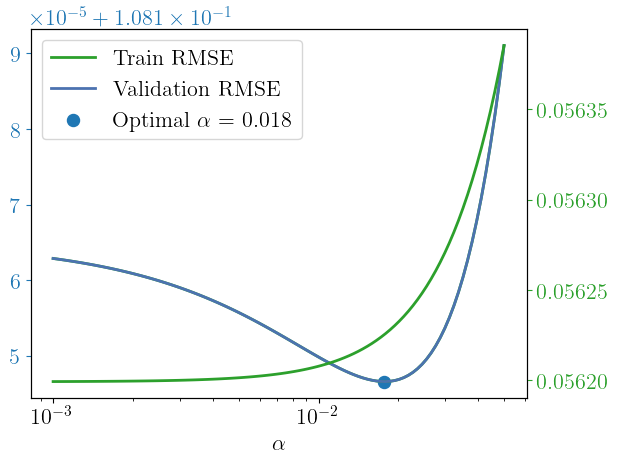

In [11]:
cv_rmse_valid_vals = []
cv_rmse_train_vals = []

fig, ax1 = plt.subplots()
alp_pot_min = 1e-3
alp_pot_max = 0.05
alphas = np.logspace(np.log10(alp_pot_min),np.log10(alp_pot_max),100) #[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
for alpha in alphas:
    rmse_test, rmse_train = cv_rmse_ridge(alpha)
    cv_rmse_valid_vals.append(rmse_test)
    cv_rmse_train_vals.append(rmse_train)


ax2 = ax1.twinx()

ax1.semilogx(alphas, cv_rmse_valid_vals, '-', label='Train RMSE',lw =  2, color = 'tab:green')
ax1.semilogx(alphas, cv_rmse_valid_vals, '-', label='Validation RMSE',lw =  2)
ax2.semilogx(alphas, cv_rmse_train_vals, '-', label='Train RMSE', color='tab:green',lw = 2)
ax1.set_xlabel('$\\alpha$')
ax1.tick_params(axis='y', colors='tab:blue')
ax2.tick_params(axis='y', colors='tab:green')
ax1.scatter(optimal_alpha, mini_valid_alpha(optimal_alpha), c ='tab:blue',marker = 'o',s = 75, label=f'Optimal $\\alpha$ = {optimal_alpha:.3f}')
#ax1.vlines(optimal_alpha,ymin = np.min(cv_rmse_valid_vals),ymax = np.max(cv_rmse_valid_vals), colors='tab:red', linestyles='dashed', label=f'Optimal $\\alpha$ = {optimal_alpha:.3f}')
ax1.legend()
#ax2.legend()

In [12]:
# Run loop kfold to determine RMSE for each fold

ols_rmse_folds = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X_stand[train_index], X_stand[test_index]
    E_train, E_test = E_stand[train_index], E_stand[test_index]

    ols = sklearn.linear_model.LinearRegression(fit_intercept=False)
    ols.fit(X_train, E_train)

    E_pred = ols.predict(X_test)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(E_test, E_pred))
    ols_rmse_folds.append(rmse)
    print(f'Fold {i+1}, RMSE: {rmse:.4f}')

# Cross validate over the folds
cv_rmse_ols = np.mean(ols_rmse_folds)
print(f'Cross validated/Average RMSE: {cv_rmse_ols:.6f}')

Fold 1, RMSE: 0.1367
Fold 2, RMSE: 0.0770
Fold 3, RMSE: 0.1224
Fold 4, RMSE: 0.0693
Fold 5, RMSE: 0.0717
Fold 6, RMSE: 0.0957
Fold 7, RMSE: 0.1755
Fold 8, RMSE: 0.1133
Fold 9, RMSE: 0.1297
Fold 10, RMSE: 0.0902
Cross validated/Average RMSE: 0.108165


### ECI size comparison

ECI mean size difference: 8.174187277035293e-05


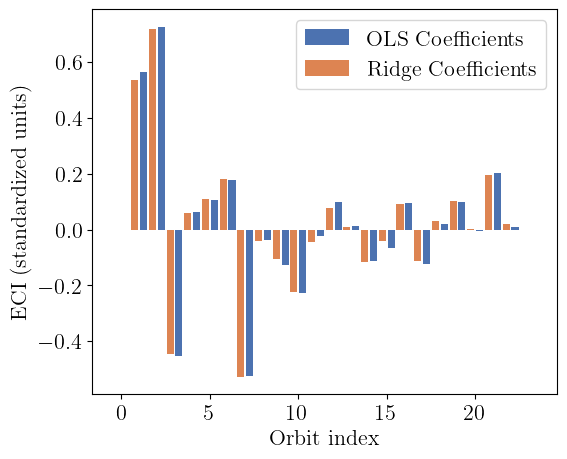

In [13]:
indices = np.arange(len(J_ols))

fig = plt.figure(figsize=(6,5))

plt.bar(indices + 0.25, J_ols, width=0.4, label='OLS Coefficients')
plt.bar(indices - 0.25, J_ridge[0], width=0.4, label='Ridge Coefficients')
plt.xlabel('Orbit index')
plt.ylabel('ECI (standardized units)')
plt.legend()

print(f'ECI mean size difference: {np.mean(J_ols - J_ridge)}')

### De-standardize

In [14]:
print(X[7,:])

[ 1.          0.33333333  0.11111111  0.55555556 -0.33333333  0.11111111
  0.55555556 -0.33333333  0.11111111  0.33333333 -0.11111111 -0.55555556
 -0.11111111  0.33333333 -0.55555556 -0.11111111  0.33333333 -0.11111111
 -1.         -0.55555556  0.33333333  1.         -0.33333333  0.11111111]


## Task 3: Covariance matrix for cluster similarity (4p)

Ridge regression regularizes parameters by using the $\alpha$ to penalize larger absolute values of the ECIs. This is a very general approach that works for a broad range of problems, and can be motivated by physical intuition in that smaller parameter values are favored. However, we can improve upon Ridge regression by creating more elaborate regularization schemes that inlcude physical intuition about our specific system. 

One example of such physical intuition is that we expect cluster orbits with more sites and with a larger distance between them to contribute less to the overall energy of the structure than smaller/more compact clusters. In other words, we expect that the ECIs decrease with the number of sites and the size of a orbit. Following the approach outlined Mueller et al. in [Physical Review B **80**, 024103 (2009)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.80.024103), this can be achieved by modifying the Ridge least-squares estimator as follows: 

$$
J_{opt, Cov} = (X^T X + \Lambda)^{-1} X^T E.
$$

Here, $\Lambda$ is known as the *regularization matrix*. Using this regularization matrix is the same as using the following prior over the ECIs

$$
P(J|X) \propto e^{-J^T \Lambda J /2}.
$$

This is a multivariate normal distribution over the components of $J$ with covariance $\Lambda^{-1}$, and hence we can interpret $\Lambda$ to be the inverse of the covariance matrix for the prior distribution  of $J$. By modifying $\Lambda$, we can thus encode physical intuition similarly to how we usually specify priors in a fully Bayesian approach. 

The elements of $\Lambda$ are given by
$$
\Lambda_{\alpha,\alpha} = \frac{\sigma^2}{\sigma_\alpha^2} + \sum_{\beta | \beta\neq\alpha} \frac{\sigma^2}{\sigma_{\alpha\beta}}\\
\Lambda_{\alpha\beta} = \Lambda_{\beta\alpha} = - \frac{\sigma^2}{\sigma_{\alpha\beta}^2}.
$$

It is useful to consider the extremal cases for the elements of $\Lambda$, using the reduced values $\lambda_{\alpha}=\sigma^2/\sigma_\alpha^2$ and  $\lambda_{\alpha\beta}=\sigma^2/\sigma_{\alpha\beta}^2$.

1. $\lambda_{\alpha} \rightarrow \infty$: force ECI for orbit $\alpha$ to zero (= remove orbit)
1. $\lambda_{\alpha} \rightarrow 0$ and $\lambda_{\alpha\beta} \rightarrow 0$: all ECIs/orbits are equally likely; this recovers OLS
1. $\lambda_{\alpha\beta} \rightarrow 0$: no correlation (coupling) between orbits; this recovers ridge regression if $\lambda_\alpha$ is the same for all orbits
1. $\lambda_{\alpha\beta} \rightarrow \infty$: force two orbits to have the same ECI

In this project we will only focus on the diagonal elements $\lambda_\alpha$, and set the off-diagonal elements $\lambda_{\alpha\beta}=0$. We will thus not merge any cluster orbits. Merging cluster orbits has the benefit of constraining the parameter space, simplifying optimization procedure. See the demo `cluster-expansion-construction` for details.

We can thus encode our prior information/physical intuition that orbits with more sites/larger size should have smaller ECIs by modifying the parameters $\lambda_\alpha$. To demonstrate this approach, we calculate $\lambda_\alpha$ according to the following (linear) regularization scheme

$$ 
\lambda_\alpha(n,r, \gamma) = \gamma_1r+\gamma_2n, 
$$

where $n$ and $r$ is the number of sites and radius of orbit $\alpha$ respectively. $\lambda_\alpha$ grows with larger $n$ and $r$, decreasing the size of that ECI. The problem is now reduced to finding the two optimal hyperparameters $\gamma$, instead of finding all the $\lambda_\alpha$ individually.

**Tasks:**
* Find the hyperparameters $\gamma$ that minimizes the CV-RMSE of the model with $J_{opt, Cov}$.
* Compare the CV-RMSE and the ECIs to OLS and Ridge from Task 2. 

**Discuss:**
* What is the interpretation of having an individual parameter $\lambda_\alpha$ for each orbit? How does this compare to Ridge regression?
* How does the CV-RMSE and the ECIs compare to OLS and Ridge? Can you explain it? 

*Hints*
* You can use, e.g., [`scipy.minimize.optimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to optimize the hyperparameters $\gamma$. 

In [15]:
# Run Kfold loop with optimal alpha to determine RMSE for each fold

def lambs(gamma,n,r):
    return gamma[0] * r + gamma[1] * n

def cv_rmse_cov(gamma, X_stand = X_stand, E_stand=E_stand):
    # Assuming validation and test data are the same here
    ridge_rmse_valid_folds = []
    ridge_rmse_train_folds = []

    for i, (train_index, test_index) in enumerate(kf.split(X_stand)):
        X_train, X_test = X_stand[train_index], X_stand[test_index]
        E_train, E_test = E_stand[train_index], E_stand[test_index]
        
        r = []; lam = []; n = []
        lam.append(1)
        for j in range(len(cs.orbit_list)):
            r_j = cs.orbit_list[j].radius

            #print(f"Orbit {j} sites: {len(cs.orbit_list[j].sites)}" )
            n_j = len(cs.orbit_list[j].sites)


            lam.append(lambs(gamma,n_j,r_j))
            
            r.append(r_j)
            n.append(n_j)
        
        Lam = np.diag(np.array(lam))

        # Fit data
        #ridge = sklearn.linear_model.Ridge(alpha=alpha, fit_intercept=False, max_iter=50000, tol=1e-6)
        #ridge.fit(X_train, E_train)

        J = np.linalg.pinv(X_train.T @ X_train + Lam) @ X_train.T @ E_train
        # RMSE
        #J = ridge.coef_.T
        #E_pred_valid = X_test @ J #ridge.predict(X_test)
        #E_pred_train = X_train @ J #ridge.predict(X_train)

        rmse_valid = np.sqrt(compute_mse(X_test, E_test, J))
        ridge_rmse_valid_folds.append(rmse_valid)
        rmse_train = np.sqrt(compute_mse(X_train, E_train, J))
        ridge_rmse_train_folds.append(rmse_train)
        # print(f'Fold {i+1}, RMSE: {rmse:.4f}')# eV/atom')

    # Cross validate over the folds
    cv_rmse_valid = np.mean(ridge_rmse_valid_folds)
    cv_rmse_train = np.mean(ridge_rmse_train_folds)
    # print(f'Cross validated/Average test RMSE: {cv_rmse_test:.6f}')
    # print(f'Cross validated/Average train RMSE: {cv_rmse_train:.6f}')
    return cv_rmse_valid, cv_rmse_train
# cv_rmse_valid, cv_rmse_train = cv_rmse_ridge(clf.alpha_)
print(cv_rmse_cov([1.,1.]))

(0.19943793914081337, 0.13131203565081787)


In [16]:
def mini_valid_gamma(gamma):
    cv_rmse_valid, cv_rmse_train = cv_rmse_cov(gamma)
    return cv_rmse_valid

from scipy.optimize import minimize

gamma_initial = [0.1,0.1]
res = minimize(mini_valid_gamma, gamma_initial,tol=1e-20,bounds = [(0.,1),(0,1)])
optimal_gamma = res.x

print(optimal_gamma)

[0.13068976 0.04937048]


In [17]:
def contour_plotter(func, xlim, ylim, size=20,args = None):
    x = np.linspace(xlim[0], xlim[1], size)
    y = np.linspace(ylim[0], ylim[1], size)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if args is not None:
                Z[i, j] = func(np.hstack((args,[X[i, j], Y[i, j]])))
            else:
                Z[i, j] = func([X[i, j], Y[i, j]])
    return X, Y, Z

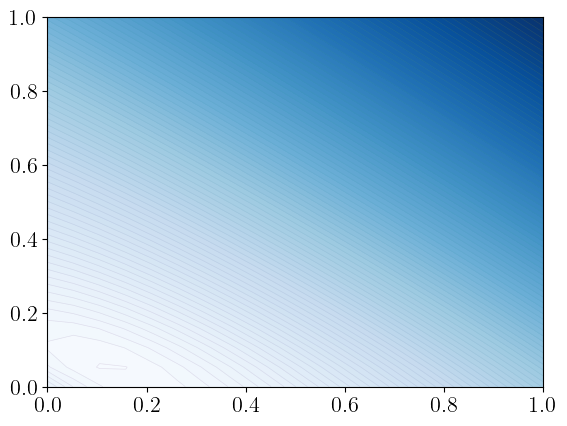

In [18]:
X_,Y_,Z_ = contour_plotter(mini_valid_gamma, (0, 1), (0, 1))
level = 100
plt.contour(X_, Y_, Z_, levels=level, alpha=0.1, linewidths=0.5)
plt.contourf(X_, Y_, Z_, levels=level, cmap='Blues')


In [19]:
g1 = np.linspace(0,0.2,50)
g2 = np.linspace(0,0.1,len(g1))

g1grid, g2grid = np.meshgrid(g1,g2)

n = 0
func = np.zeros((len(g1),len(g2)))
sum_like = 0
for g1_i,i in zip(g1, range(len(g1))):
    for g2_i,j in zip(g2, range(len(g2))):
        func[i,j] = mini_valid_gamma([g1_i,g2_i])
        if 100 * n / (len(g1) * len(g2)) % 1 == 0:
            print(f'n% = {100 * n / (len(g2) * len(g1))}')
        n+=1

n% = 0.0
n% = 1.0
n% = 2.0
n% = 3.0
n% = 4.0
n% = 5.0
n% = 6.0
n% = 7.0
n% = 8.0
n% = 9.0
n% = 10.0
n% = 11.0
n% = 12.0
n% = 13.0
n% = 14.0
n% = 15.0
n% = 16.0
n% = 17.0
n% = 18.0
n% = 19.0
n% = 20.0
n% = 21.0
n% = 22.0
n% = 23.0
n% = 24.0
n% = 25.0
n% = 26.0
n% = 27.0
n% = 28.0
n% = 29.0
n% = 30.0
n% = 31.0
n% = 32.0
n% = 33.0
n% = 34.0
n% = 35.0
n% = 36.0
n% = 37.0
n% = 38.0
n% = 39.0
n% = 40.0
n% = 41.0
n% = 42.0
n% = 43.0
n% = 44.0
n% = 45.0
n% = 46.0
n% = 47.0
n% = 48.0
n% = 49.0
n% = 50.0
n% = 51.0
n% = 52.0
n% = 53.0
n% = 54.0
n% = 55.0
n% = 56.0
n% = 57.0
n% = 58.0
n% = 59.0
n% = 60.0
n% = 61.0
n% = 62.0
n% = 63.0
n% = 64.0
n% = 65.0
n% = 66.0
n% = 67.0
n% = 68.0
n% = 69.0
n% = 70.0
n% = 71.0
n% = 72.0
n% = 73.0
n% = 74.0
n% = 75.0
n% = 76.0
n% = 77.0
n% = 78.0
n% = 79.0
n% = 80.0
n% = 81.0
n% = 82.0
n% = 83.0
n% = 84.0
n% = 85.0
n% = 86.0
n% = 87.0
n% = 88.0
n% = 89.0
n% = 90.0
n% = 91.0
n% = 92.0
n% = 93.0
n% = 94.0
n% = 95.0
n% = 96.0
n% = 97.0
n% = 98.0
n% = 99.0


0.1306122448979592 0.0489795918367347


Text(0, 0.5, '$\\gamma_2$')

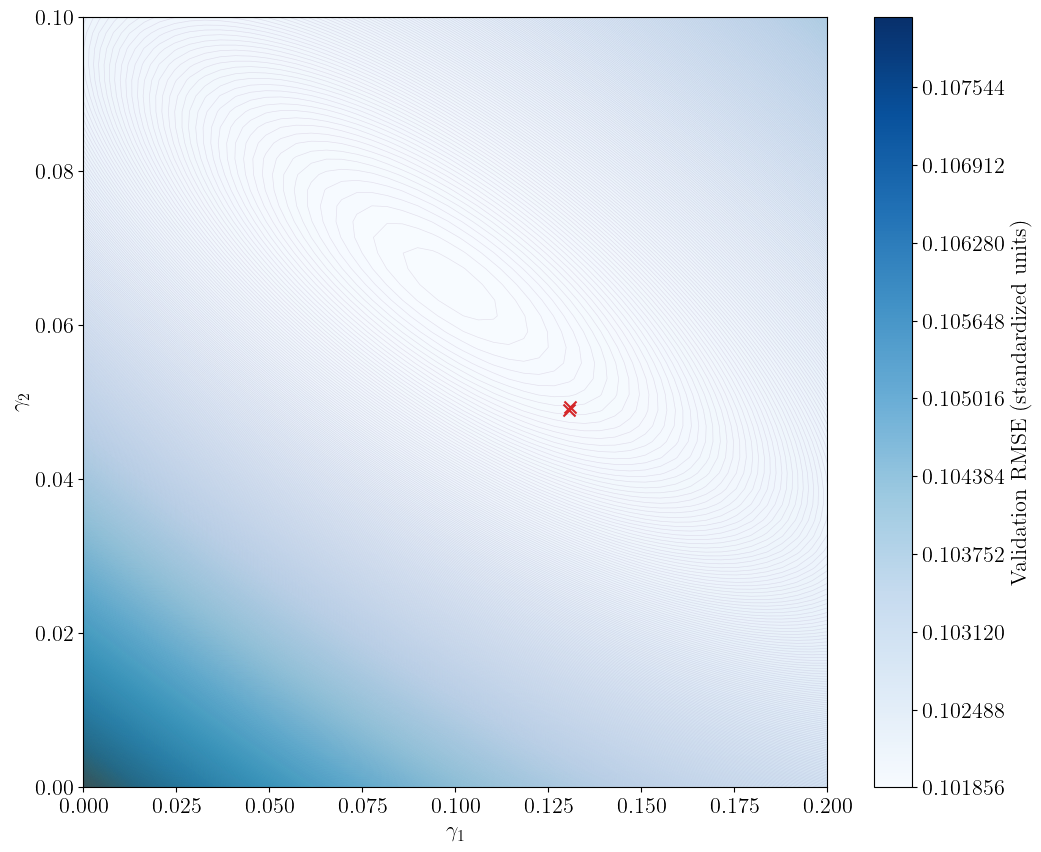

In [20]:
fig = plt.figure(figsize=(12,10))
inds = (np.unravel_index(np.argmin(func), func.shape))

print(g1[inds[0]], g2[inds[1]])
level = 1000
plt.contour(g1grid, g2grid, func, levels=level, alpha=0.1, linewidths=0.5)
plt.contourf(g1grid, g2grid, func, levels=level, cmap='Blues')
plt.colorbar(label='Validation RMSE (standardized units)')

plt.scatter(g1[inds[0]], g2[inds[1]], c ='tab:red',marker = 'x',s = 75, label=f'Optimal $\\gamma_1$ = {optimal_gamma[0]:.3f}, $\\gamma_2$ = {optimal_gamma[1]:.3f}')
plt.scatter(optimal_gamma[0],optimal_gamma[1], c ='tab:red',marker = 'x',s = 75, label=f'Optimal $\\gamma_1$ = {optimal_gamma[0]:.3f}, $\\gamma_2$ = {optimal_gamma[1]:.3f}')
plt.xlabel('$\\gamma_1$')
plt.ylabel('$\\gamma_2$')

## Task 4: Bayesian Cluster expansion (4.5p)


A full Bayesian analysis includes the hyperparameters for the prior distribution as parameters to be optimized, which means that they are also sampled and optimized in conjunction with the model parameters. This can be compared to the Covariance approach in Task 3, which finds a single optimal prior distribution. 

In this task, you will perform a full Bayesian analysis for the ECIs.

### Priors
For this problem you can use a gaussian prior for the ECIs with a zero mean and variance $\alpha ^2$. This can be defined as
\begin{equation}
P(\boldsymbol{J}) = \frac{1}{(2\pi \alpha^2)^{N_p/2}}\exp{(-||\boldsymbol{J}||^2 / 2\alpha^2)}
\end{equation}
where $N_p$ is the number of ECIs (length of vector $\boldsymbol{J}$). 

We assume homoscedastic errors in this task, and let $\sigma$ be the standard deviation in the likelihood.
For the priors over $\sigma$ and $\alpha$ you can for example use inverse gamma distributions. The total prior $P(\boldsymbol{J}, \sigma, \alpha)$  is then given by the product of all priors.

### Posterior
In this task you will generate cluster expansion models from the posterior probability distribution $P(\boldsymbol{J}|D)$, where $D$ is the training data (cluster-vectors and energies). The posterior is defined as
\begin{equation}
\underbrace{P(\boldsymbol{J}, \sigma^2, \alpha|D)}_\text{posterior} = \underbrace{P(D|\boldsymbol{J}, \sigma)}_\text{likelihood} \underbrace{P(\boldsymbol{J}, \sigma, \alpha)}_\text{prior}/P(D)
\end{equation}


**Tasks:**
* Define the (log) liklihood, (log) prior and (log) posterior functions.
* Sample the posterior distribution using MCMC and generate about 100-1000 (uncorrelated) samples (models).
* Visualize the ECIs for a MCMC chain.

**Discuss:**
* How many parameters seems "necessary" (non-zero) according to your MCMC sampling?
* What would happen if you had set your priors to something "unphysical", for instance to favor 3rd and 4th order clusters very highly?

*Hints:*
* `emcee` can be used for the MCMC sampling
* You may need to use a long burn-in period
* From previous tasks we know and $\sigma$ to be in the range 0.02-2 and $\alpha$ to be in the range 0.05-0.5.

**If you are using `emcee` for the MCMC sampling, please use the following code snippet when defining the sampler.**
This uses the `HDF` backend, which saves the sampling chain to a `.h5`-file instead of keeping it in memory. 
This is especially important if you are using the JupyterHub server, as otherwise the memory may fill up, decreasing the performance for everyone using the server. 

In [21]:
# def log_prior(theta):
#     J = theta[:-2]
#     sigma = theta[-1]
#     alpha = theta[-2]
#     log_J_pri = np.sum(scipy.stats.norm.logpdf(J, loc=0, scale=alpha))
#     log_sig_pri= scipy.stats.invgamma.logpdf(sigma, a=1, scale=1)
#     log_alp_pri = scipy.stats.invgamma.logpdf(alpha, a=1, scale=1)
#     return log_J_pri + log_alp_pri + log_sig_pri

# def log_likelihood(theta, X = X_stand, E = E_stand):
#     sigma = theta[-1]
#     J = theta[:-2]
#     E_pred = (X @ J).flatten()
#     E = E.flatten()
#     #log_lik = -0.5 * N * np.log(2 * np.pi * sigma**2) - (resid @ resid) / (2 * sigma**2)
#     log_lik = (scipy.stats.norm.logpdf(E_pred - E, loc=0, scale=sigma))

#     #Nd = len(E)
#     #resid = E - X @ J
#     #W = 1.0 / (sigma**2) #* (Nd * 1 / np.sum(1 /(mu_err**2)))
#     #quad = -1/2 * np.sum(resid**2 * W) / sigma
#     #const = -Nd/2 * np.sum(np.log(2 * np.pi * theta[2])) + 1/2 * np.sum(np.log(W))
#     #log_lik = quad + const



#     return log_lik[10]

# def log_post(theta):
#     lp = log_prior(theta)
#     ll = log_likelihood(theta)
#     if np.isinf(lp) or np.isinf(ll):
#         return -np.inf
#     return lp + ll

In [44]:
def log_likelihood(theta, E = E_stand, X = X_stand):
    if len(theta) == X.shape[1] + 2:
        J = theta[:-2]      # First 24 parameters in theta
        alpha = theta[-1]
        sigma = theta[-2]
    else:
        J = theta
        alpha = 1.0
        sigma = 1.0
    # print(E.shape)
    E_vec = E.reshape(-1)
    # print(E_vec.shape)
    resid = E_vec - X @ J

    # n = len(E_vec)
    # return -(0.5 * n) * np.log(2*np.pi*sigma**2) - (0.5 / sigma**2) * np.dot(resid, resid)
    return scipy.stats.norm.logpdf(resid, loc=0, scale=sigma).sum()


def log_prior(theta):
    if len(theta) == X.shape[1] + 2:
        J = theta[:-2]      # First 24 parameters in theta
        alpha = theta[-1]
        sigma = theta[-2]
    else:
        J = theta
        alpha = 1.0
        sigma = 1.0
    log_J_pri = scipy.stats.norm.logpdf(J, loc=0, scale=alpha).sum()
    log_sig_pri = scipy.stats.invgamma.logpdf(sigma, a=1, scale=1)
    log_alp_pri = scipy.stats.invgamma.logpdf(alpha, a=1, scale=1)
    return log_J_pri + log_sig_pri + log_alp_pri

def log_post(theta):
    lp = log_prior(theta)
    ll = log_likelihood(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + ll

Text(0.5, 0, '$\\sigma$')

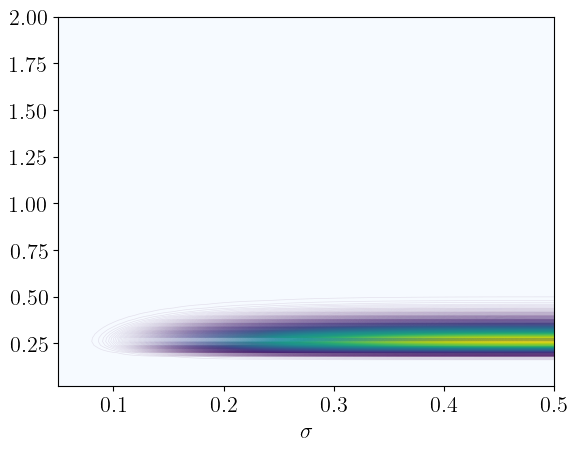

In [45]:
alphas, sigmas, post = contour_plotter(log_prior,(0.05,0.5),(0.02,2),size=100,args = J_ols)

plt.contour(alphas, sigmas, np.exp(post), levels=level, alpha=0.1, linewidths=0.5)
plt.contourf(alphas, sigmas, np.exp(post), levels=100, cmap='Blues')
plt.xlabel('$\\alpha$')
plt.xlabel('$\\sigma$')

Text(0, 0.5, '$\\sigma$')

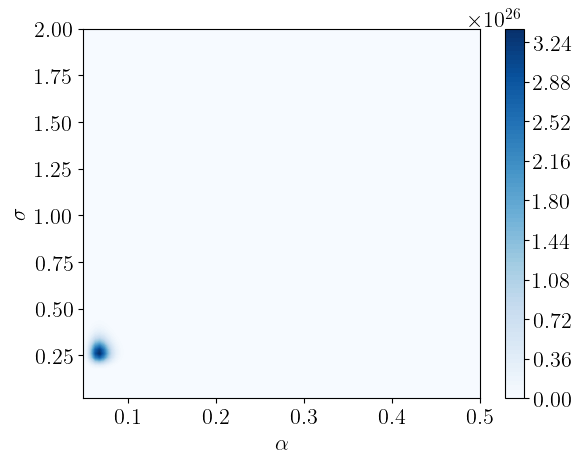

In [46]:
alphas, sigmas, post = contour_plotter(log_post,(0.05,0.5),(0.02,2),size=100,args = J_ols)

#plt.contour(alphas, sigmas, np.exp(post), levels=level, alpha=0.1, linewidths=0.5,color = 'black')
plt.contourf(alphas, sigmas, np.exp(post), levels=100, cmap='Blues')
plt.colorbar()
plt.xlabel('$\\alpha$')
plt.ylabel('$\\sigma$')

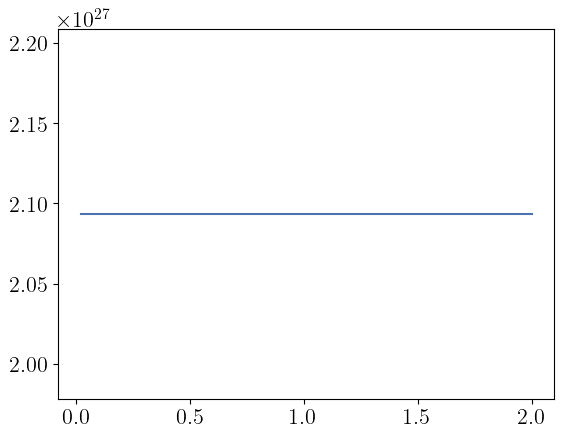

(1000,)


In [47]:
sigmas = np.linspace(0.02,2,1000)
like_vals = []
for s in sigmas:
    like_vals.append((log_likelihood(np.hstack((J_ridge.flatten(),0.1,s)))))

plt.plot(sigmas, np.exp(like_vals))
plt.show()
#np.sum(np.trapz(np.exp(like_vals), sigmas))
like_vals = np.array(like_vals)
print(like_vals.shape)



In [48]:

log_likelihood(np.hstack([J_ridge.flatten(), optimal_alpha, 2]))

-126.61422807441836

In [59]:
def samples_MCMC(theta_lim, post,nwalkers, burninproc =10 , iterations = 10000):
    """
    Sets up an MCMC sampler with initial positions for the walkers.

    Args:
        theta_0_lims (list): Minimum and maximum boundary for starting position in theta0.
        theta_1_lims (list): Minimum and maximum boundary for starting position in theta1.
        x (array): Independent data.
        y (array): Dependent data.
        post (callable): Function to compute the log-posterior or log-likelihood.
        nwalkers (int): Number of MCMC walkers.

    Returns:
        sampler (emcee.EnsembleSampler): Initialized MCMC sampler object.
    """
    
    ndim = len(theta_lim)  # Since theta has three parameters:

    rng = np.random.default_rng(seed = 1337)
    low = theta_lim[:,0]
    high = theta_lim[:,1]

    # Initialize walker positions uniformly within the specified limits

    p0 = rng.uniform(low,high,size = (nwalkers,ndim))

    #p0 = np.vstack((p0_J,sig,alp)).T

    burnin = int(burninproc*iterations/100)

    # Set up the MCMC sampler with the log posterior function
    sampler_post = emcee.EnsembleSampler(nwalkers, ndim, post)
    #new_pos, prob, state = sampler_post.run_mcmc(p0, burnin, progress=True)

    run = sampler_post.run_mcmc(p0, iterations, progress=True)
    samples = sampler_post.get_chain(discard = burnin,flat = True)

    return sampler_post

In [80]:
J_min = -1; J_max = 1
alp_min = 0.1; alp_max = 1
sig_min = 0.1; sig_max = 1

theta_lims = np.zeros((26,2))
for i in range(26):
    if i <= 23:
        theta_lims[i,0] = J_min
        theta_lims[i,1] = J_max
    elif i == 24:
        theta_lims[i,0] = alp_min
        theta_lims[i,1] = alp_max
    else:
        theta_lims[i,0] = sig_min
        theta_lims[i,1] = sig_max
nwalkers = 75


In [87]:
sampler = samples_MCMC(theta_lims, log_post ,nwalkers, burninproc = 10 , iterations = 10000)

100%|██████████| 10000/10000 [01:52<00:00, 89.24it/s]


In [88]:
import corner

samples = sampler.get_chain(flat=True)

print(samples.shape)
#fig = corner.corner(samples, labels=[r"$H_0$", r"$q_0$",r"$\sigma^2$"], color='tab:blue',
#                show_titles=True, bins=30, plot_contours=True, plot_datapoints=True, 
#                plot_density=True,quantiles=[0.16,0.5,0.84])

(750000, 26)


In [89]:
def running_mean(x, factor=0.01):
    """
    Return the running mean of N element in a list.

    Args:
        x (ndarray): The list of elements,
        factor (float): The factor to multiply the length of the list by.
    
    Returns:
        ndarray: The running mean.
    """
    it, walker = x.shape
    N = int(factor * it)
    average = np.zeros((it - N+1,walker))

    for i in range(walker):
        cumsum = np.cumsum(np.insert(x[:,i], 0, 0))
        average[:,i] = ((cumsum[N:] - cumsum[:-N]) / float(N))

    return average


def trace_plotter(samples):
    ndim = samples.shape[1]
    print(ndim)
    fig, axes = plt.subplots(ndim, figsize=(4, 1.5 *ndim), sharex=True)
    #labels = [r"$H_0$", r"$q_0$", r"$\sigma^2$"]
    mean = running_mean(samples)
    if ndim == 1:
        axes.plot(samples, "tab:blue", alpha=0.7)
        axes.plot(np.arange(len(mean)), mean, color='tab:red')
        axes.tick_params(direction='in')
        axes.set_ylabel('$\\Omega_{M,0}$')
        axes.set_xlabel("step number");
    else:
        for i,ax in zip(range(ndim),axes):
            ax.plot(samples[:, i], "tab:blue", alpha=0.7)
            ax.plot(np.arange(len(mean)), mean[:,i], color='tab:red')
            if i <=23:
                ax.set_ylabel(f'$J_{{{i}}}$')
            elif i ==24:
                ax.set_ylabel('$\\alpha$')
            else:
                ax.set_ylabel('$\\sigma$')
            ax.tick_params(direction='in')

        axes[-1].set_xlabel("step number");
    plt.tight_layout()
    #plt.savefig('figs/trace_plot.pdf')
    plt.show()

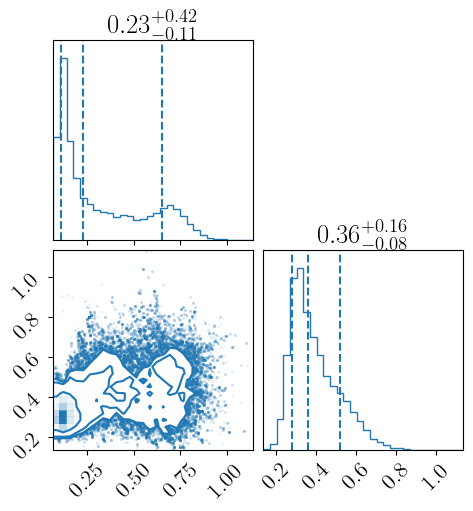

In [86]:
fig = corner.corner(samples[:,-2:], color='tab:blue',
                show_titles=True, bins=30, plot_contours=True, plot_datapoints=True, 
                plot_density=True,quantiles=[0.16,0.5,0.84])

26


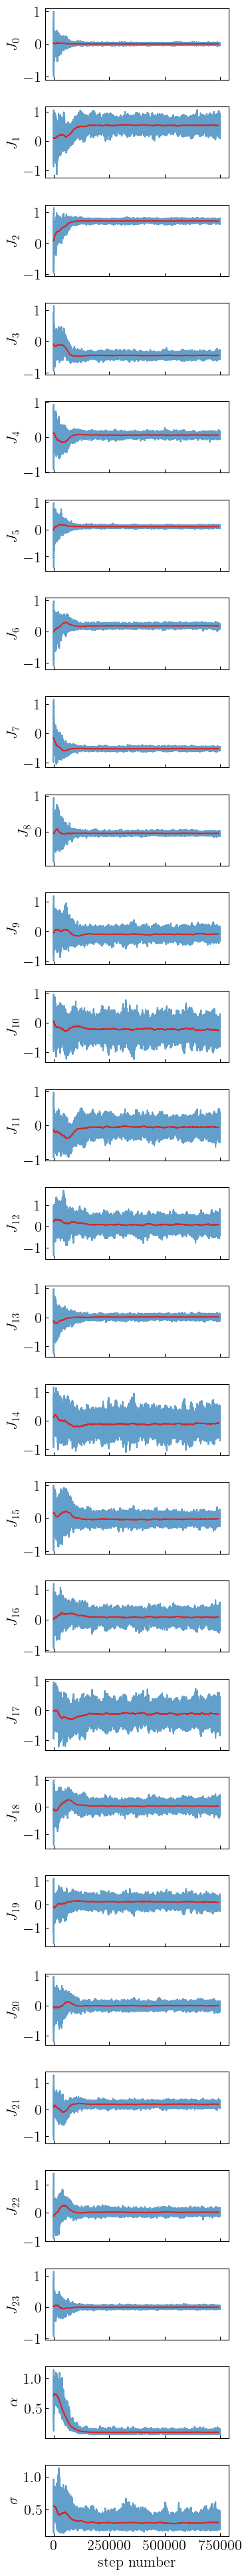

In [90]:
trace_plotter(samples)

## Task 5: ARDR Feature selection (4p)

The techniques previously studied (Task 2-4) have been rather hands-on in that the user has quite a lot of control over how the parameter priors are constructed and optimized. Automatic Relevance Detection Regression (ARDR) on the other hand offers an automatic approach to optimizing the shape of the parameter priors, through several different shape parameters. In this task you will investigate how ARDR performs while varying a single shape parameter known as `threshold_lambda` in the [scikit-documentation for ARDR](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html).  


Scan a range of values for the hyper-parameter and evaluate CV-error and IC to determine a good value for the hyper-parameters. Records also how many nonzero parameters you obtained.

To demonstrate the power of ARDR, increase the cutoffs in the cluster space to `[13,8,6]`, which greatly increases the number of parameters and makes the problem very overdetermined. 

**Tasks:**
* Compute the training and CV error for a range of values for `threshold_lambda`.
* Visualize the training error and CV-error as well as the AIC/BIC as function of number of non-zero parameters in the model.   

**Discuss:**
* How many features you think is suitable to include in a final model based on your analysis.
* Which ECIs are selected here? Is there a difference to OLS/Ridge/Covariance approach?

In [ ]:
# Your code here

## Task 6: The ground state (3p)

In this final task, you will compare all the earlier techniques (Tasks 2-5) in predicting the ground state of candidate clusters.The ground-state structure refers to the structure with the lowest energy for a given concentration. Macroscopic properties like thermal conductivity, heat-capacity etc can depend strongly on the particular ground-state configuration and it is therefore important to know the correct ground-state structure.

In the database `ground_states_candidates.db` you will find potential ground-state candidates. In this task you will assign each ground-state candidate in the database an estimated energy, and use your results from task 4 to estimate the probability of each candidate being the actual ground-state.

**Tasks:**
* Use the models that you've studied in Tasks 2-5 to predict the ground state structure and energy.
    * From Task 2, use OLS and the RIDGE model with optimal hyperparameter that you found. 
    * From Task 3, use the optimal Covariance model that you found.
    * From Task 4, use the cluster-expansions samples (from MCMC) and compute the frequency of each candidate structure being the ground-state.
        * Also plot the disitrubtion of the ground-state energy.
    * From Task 5, use the ARDR model with the optimal hyperparameter that you found.
* Compare the results from predicting the ground state with Task 2-5 and discuss the results. 

**Discuss:**
* Can you spot any differences between the models in predicting the ground state? Why/why not?
* Which model approach do you think is the most suitable for this problem? (No right or wrong answer here; it's the discussion that's important)
    * In particular elaborate on the differences between automatic feature selection (such as Ridge/ARDR) and more hands-on, physical intuition based approaches (such as Covariance/Full Bayesian).

*Hints*
* Remember that the ECIs have previously been normalized. You will thus have to normalize the ground state candidate cluster vectors and transform the predicted energies back to the original energy scale. 

In [ ]:
# Your code here